# Objectives

## 1. Introduce to Churn
- Churn
  - voluntary churn or involuntary churn
  - non-contractual or contractual churn 
 - Customer 
  - Lack of usage
  - Poor service
  - Better price

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [24]:
url = 'https://assets.datacamp.com/production/repositories/1764/datasets/79c5446a4a753e728e32b4a67138344847b8f131/Churn.csv'
telco = pd.read_csv(url)
telco.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [5]:
telco['Churn'].value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

### Explore difference between churners and non_churners
- Do churners call customer service more often?
- Does one state have more churners compared to another? 

In [8]:
df_1 = telco[['CustServ_Calls','Vmail_Message','Churn']]
df_1.groupby(['Churn']).mean()

,CustServ_Calls,Vmail_Message
Churn,,
no,1.449825,8.604561
yes,2.229814,5.115942


In [9]:
df_1.groupby(['Churn']).std()

,CustServ_Calls,Vmail_Message
Churn,,
no,1.163883,13.913125
yes,1.853275,11.860138


In [21]:
# Count the number of churners and non-churners by State
state = telco.groupby('State')['Churn'].value_counts()
state.head(20)

State  Churn
AK     no       49
       yes       3
AL     no       72
       yes       8
AR     no       44
       yes      11
AZ     no       60
       yes       4
CA     no       25
       yes       9
CO     no       57
       yes       9
CT     no       62
       yes      12
DC     no       49
       yes       5
DE     no       52
       yes       9
FL     no       55
       yes       8
Name: Churn, dtype: int64

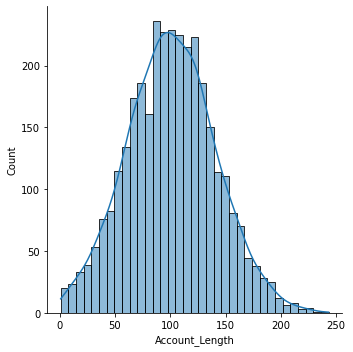

In [23]:
# visualize the distribution of account lengths
sns.displot(telco['Account_Length'], kde = True)
plt.show()

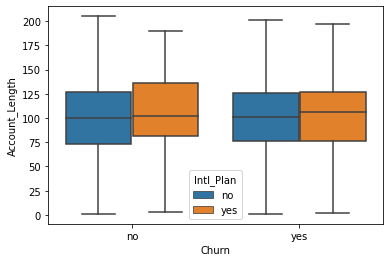

In [27]:
sns.boxplot(x = 'Churn',
           y = 'Account_Length',
           data = telco, 
           sym = "",
           hue = 'Intl_Plan')
plt.show()

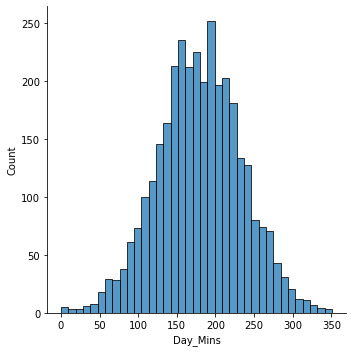

In [29]:
# Visualize the distribution of 'Eve_Mins'
sns.displot(telco['Day_Mins'])

# Display the plot
plt.show()

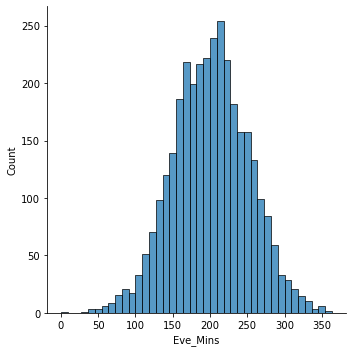

In [30]:
# Visualize the distribution of 'Eve_Mins'
sns.displot(telco['Eve_Mins'])

# Display the plot
plt.show()

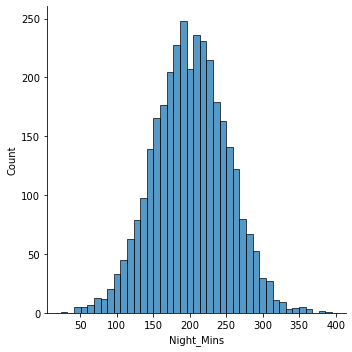

In [33]:
# Visualize the distribution of 'Night_Mins'
sns.displot(telco['Night_Mins'])

# Display the plot
plt.show()

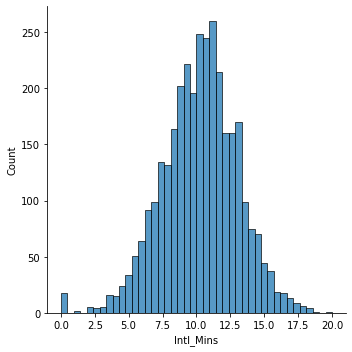

In [32]:
# Visualize the distribution of 'Night_Mins'
sns.displot(telco['Intl_Mins'])

# Display the plot
plt.show()

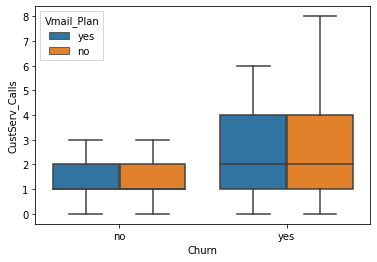

In [34]:
# "Vmail_Plan" as a third variable
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            sym = "",
            hue = "Vmail_Plan")

# Display the plot
plt.show()

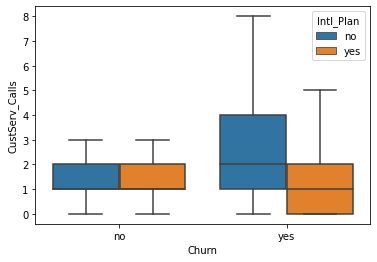

In [35]:
# Update "Intl_Plan" as a third variable
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            sym = "",
            hue = "Intl_Plan")

# Display the plot
plt.show()

## 2. Data preprocessing
- Check the assumptions 
  - The features are normally distributed
  - The features are on the same scale 
- Data types
  - require numeric datatype 
  - need to encode categorical variables as numeric 
    - **.replace()**
    - **LabelEncoder()**
    - assign numbers to each state: such as 'low','medium','high' etc
    - One hot encoding: **.get_dummies()**
- Features scaling 
  - Features should be on the same scale
  - Rarely true of real_world data
  - Standardization: **StandardScaler**
    - Centres the distribution around the mean
    - Calculates the number of standard deviations away from the mean each point is
- Feature selection: drop unnecessary features 
  - Unique identifiers: phone numbers, social security numbers and account numbers
  - Features that are highly correlated with other features can also be dropped, as no useful additional information provided: **.corr()**
- Feature engineering: creating new features to help improve model performance, for example, **Tot_Mins** or **Ratio between mins and charge**
  - should consult with business and subject matter experts

In [33]:
telco['Intl_Plan'] = telco['Intl_Plan'].replace({
    'no': 0,
    'yes': 1
})

telco['Intl_Plan'].head()

0    0
1    0
2    0
3    1
4    1
Name: Intl_Plan, dtype: int64

In [34]:
from sklearn.preprocessing import LabelEncoder

LabelEncoder().fit_transform(telco['Intl_Plan'])
telco['Intl_Plan'].head()

0    0
1    0
2    0
3    1
4    1
Name: Intl_Plan, dtype: int64

In [7]:
telco['State'].nunique()

51

In [9]:
telco[['Intl_Calls', 'Night_Mins']].describe()

,Intl_Calls,Night_Mins
count,3333.000000,3333.000000
mean,4.479448,200.872037
std,2.461214,50.573847
min,0.000000,23.200000
25%,3.000000,167.000000
50%,4.000000,201.200000
75%,6.000000,235.300000
max,20.000000,395.000000


In [10]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

In [14]:
telco[['Churn','Intl_Plan','Vmail_Plan','State','Phone']].nunique()

Churn            2
Intl_Plan        2
Vmail_Plan       2
State           51
Phone         3333
dtype: int64

In [15]:
telco['Phone']

0       382-4657
1       371-7191
2       358-1921
3       375-9999
4       330-6626
          ...   
3328    414-4276
3329    370-3271
3330    328-8230
3331    364-6381
3332    400-4344
Name: Phone, Length: 3333, dtype: object

In [25]:
telco = telco.drop(['Phone'], axis = 1)
telco.head(2)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,110,45.07,99,16.78,91,11.01,3,2.7,KS,415
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,123,27.47,103,16.62,103,11.45,3,3.7,OH,415


In [35]:
telco.to_csv('/QXJ/Python/Datacamp/Marketing/telco.csv')

In [27]:
# Replace 'no' with 0 and 'yes' with 1 in 'Vmail_Plan'
telco['Vmail_Plan'] = telco['Vmail_Plan'].replace({
    'no': 0,
    'yes': 1
})

telco['Vmail_Plan'].head()

0    1
1    1
2    0
3    0
4    0
Name: Vmail_Plan, dtype: int64

In [37]:
telco['Churn'] = telco['Churn'].replace({
    'no': 0,
    'yes': 1
})

telco['Churn'].head()

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64

In [38]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   int64  
 8   Intl_Plan       3333 non-null   int64  
 9   Vmail_Plan      3333 non-null   int64  
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

In [41]:
# Perform one hot encoding on 'State'
telco_state = pd.get_dummies(telco['State'], drop_first = True)
telco_state.head(3)

,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Perform scaling**

In [42]:
telco_df = telco[['Intl_Calls','Night_Mins']]
telco_df.head(2)

,Intl_Calls,Night_Mins
0,3,244.7
1,3,254.4


In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
telco_scaled = scaler.fit_transform(telco_df)
telco_scaled = pd.DataFrame(telco_scaled,
                            columns = ['Intl_Calls','Night_Mins'])
telco_scaled.describe()

,Intl_Calls,Night_Mins
count,3.333000e+03,3.333000e+03
mean,-1.264615e-16,6.602046e-17
std,1.000150e+00,1.000150e+00
min,-1.820289e+00,-3.513648e+00
25%,-6.011951e-01,-6.698545e-01
50%,-1.948306e-01,6.485803e-03
75%,6.178983e-01,6.808485e-01
max,6.307001e+00,3.839081e+00


**Feature selection and engineering*+

In [52]:
telco.drop('Churn', axis = 1).corr()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
Account_Length,1.000000,-0.004628,0.006216,-0.006757,-0.008955,0.009514,-0.003796,0.024735,0.002918,0.038470,0.006214,0.019260,-0.006745,-0.013176,-0.008960,0.020661,0.009546,-0.012463
Vmail_Message,-0.004628,1.000000,0.000778,0.017562,0.007681,0.002856,-0.013263,0.008745,0.956927,-0.009548,0.000776,-0.005864,0.017578,0.007123,0.007663,0.013957,0.002884,-0.001994
Day_Mins,0.006216,0.000778,1.000000,0.007043,0.004323,-0.010155,-0.013423,0.049396,-0.001684,0.006750,1.000000,0.015769,0.007029,0.022972,0.004300,0.008033,-0.010092,-0.008264
Eve_Mins,-0.006757,0.017562,0.007043,1.000000,-0.012584,-0.011035,-0.012985,0.019100,0.021545,-0.021451,0.007050,-0.011430,1.000000,0.007586,-0.012593,0.002541,-0.011067,0.003580
Night_Mins,-0.008955,0.007681,0.004323,-0.012584,1.000000,-0.015207,-0.009288,-0.028905,0.006079,0.022938,0.004324,-0.002093,-0.012592,0.011204,0.999999,-0.012353,-0.015180,-0.005825
Intl_Mins,0.009514,0.002856,-0.010155,-0.011035,-0.015207,1.000000,-0.009640,0.045871,-0.001318,0.021565,-0.010157,0.008703,-0.011043,-0.013605,-0.015214,0.032304,0.999993,-0.018288
CustServ_Calls,-0.003796,-0.013263,-0.013423,-0.012985,-0.009288,-0.009640,1.000000,-0.024522,-0.017824,-0.018942,-0.013427,0.002423,-0.012987,-0.012802,-0.009277,-0.017561,-0.009675,0.027572
Intl_Plan,0.024735,0.008745,0.049396,0.019100,-0.028905,0.045871,-0.024522,1.000000,0.006006,0.003755,0.049398,0.006114,0.019106,0.012451,-0.028913,0.017366,0.045780,0.048551
Vmail_Plan,0.002918,0.956927,-0.001684,0.021545,0.006079,-0.001318,-0.017824,0.006006,1.000000,-0.011086,-0.001686,-0.006444,0.021559,0.015553,0.006064,0.007618,-0.001276,-0.000747
Day_Calls,0.038470,-0.009548,0.006750,-0.021451,0.022938,0.021565,-0.018942,0.003755,-0.011086,1.000000,0.006753,0.006462,-0.021449,-0.019557,0.022927,0.004574,0.021666,-0.009646


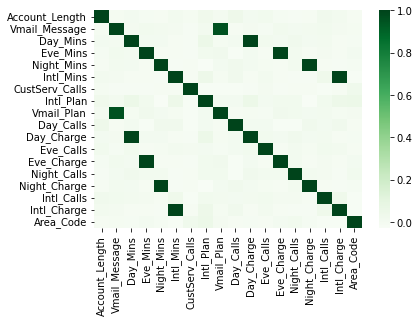

In [54]:
sns.heatmap(telco.drop('Churn', axis = 1).corr(),
            cmap = 'Greens')
plt.show()

In [64]:
telco = telco.drop(['Area_Code','State'], axis = 1)
telco.head(3)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29


In [69]:
telco['Day_Cost'] = telco['Day_Mins'] / telco['Day_Charge']
telco['Day_Cost'].head()

0    5.881961
1    5.882781
2    5.882069
3    5.882122
4    5.882145
Name: Day_Cost, dtype: float64

In [70]:
telco['Eve_Cost'] = telco['Eve_Mins'] / telco['Eve_Charge']
telco['Night_Cost'] = telco['Night_Mins'] / telco['Night_Charge']
telco['Intl_Cost'] = telco['Intl_Mins'] / telco['Intl_Charge']

In [68]:
# Create the new feature
telco['Avg_Night_Calls'] = telco['Night_Mins']/telco['Night_Calls']

# Print the first five rows of 'Avg_Night_Calls'
print(telco['Avg_Night_Calls'].head())

0    2.689011
1    2.469903
2    1.563462
3    2.212360
4    1.544628
Name: Avg_Night_Calls, dtype: float64


In [71]:
telco['Avg_Day_Calls'] = telco['Day_Mins']/telco['Day_Calls']
telco['Avg_Eve_Calls'] = telco['Eve_Mins']/telco['Eve_Calls']
telco['Avg_Intl_Calls'] = telco['Intl_Mins']/telco['Intl_Calls']

In [72]:
telco = telco.drop(['Vmail_Plan', 
                    'Day_Charge', 'Day_Mins', 'Day_Calls',
                   'Eve_Charge', 'Eve_Mins', 'Eve_Calls',
                   'Night_Charge', 'Night_Mins', 'Night_Calls'],
                  axis = 1)
telco.head(3)

,Account_Length,Vmail_Message,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Intl_Calls,Intl_Charge,Day_Cost,Avg_Night_Calls,Eve_Cost,Night_Cost,Intl_Cost,Avg_Day_Calls,Avg_Eve_Calls,Avg_Intl_Calls
0,128,25,10.0,1,0,0,3,2.70,5.881961,2.689011,11.764005,22.225250,3.703704,2.410000,1.993939,3.333333
1,107,26,13.7,1,0,0,3,3.70,5.882781,2.469903,11.762936,22.218341,3.702703,1.313821,1.898058,4.566667
2,137,0,12.2,0,0,0,5,3.29,5.882069,1.563462,11.766990,22.213115,3.708207,2.135088,1.101818,2.440000


In [74]:
telco = telco.drop(['Intl_Mins', 'Intl_Calls','Intl_Charge'], axis = 1)
telco.shape

(3333, 13)

In [75]:
telco.to_csv('/QXJ/Python/Datacamp/Marketing/telco_processed.csv')

In [141]:
telco = pd.read_csv('/QXJ/Python/Datacamp/Marketing/telco_processed.csv',index_col = 0)
telco.head(2)

,Account_Length,Vmail_Message,CustServ_Calls,Churn,Intl_Plan,Day_Cost,Avg_Night_Calls,Eve_Cost,Night_Cost,Intl_Cost,Avg_Day_Calls,Avg_Eve_Calls,Avg_Intl_Calls
0,128,25,1,0,0,5.881961,2.689011,11.764005,22.225250,3.703704,2.410000,1.993939,3.333333
1,107,26,1,0,0,5.882781,2.469903,11.762936,22.218341,3.702703,1.313821,1.898058,4.566667


In [142]:
telco.describe()

,Account_Length,Vmail_Message,CustServ_Calls,Churn,Intl_Plan,Day_Cost,Avg_Night_Calls,Eve_Cost,Night_Cost,Intl_Cost,Avg_Day_Calls,Avg_Eve_Calls,Avg_Intl_Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3331.000000,3333.000000,3332.000000,3333.000000,3315.000000,3331.000000,3332.000000,3315.000000
mean,101.064806,8.099010,1.562856,0.144914,0.096910,5.882241,2.091748,11.764544,22.222055,3.702934,1.872544,2.103754,3.112385
std,39.822106,13.688365,1.315491,0.352067,0.295879,0.000960,0.709582,0.002264,0.008177,0.004508,0.731555,0.775645,2.260809
min,1.000000,0.000000,0.000000,0.000000,0.000000,5.864662,0.227451,11.754386,22.167488,3.666667,0.023009,0.271304,0.216667
25%,74.000000,0.000000,1.000000,0.000000,0.000000,5.881773,1.608397,11.762841,22.215973,3.699634,1.379718,1.615704,1.685714
50%,101.000000,0.000000,1.000000,0.000000,0.000000,5.882209,2.005607,11.764706,22.222222,3.703704,1.790909,1.985416,2.460000
75%,127.000000,20.000000,2.000000,0.000000,0.000000,5.882730,2.461538,11.766304,22.228033,3.706294,2.262195,2.486849,3.800000
max,243.000000,51.000000,9.000000,1.000000,1.000000,5.909091,7.124242,11.773585,22.307692,3.728814,7.223333,15.608333,18.200000


In [143]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
telco_scaled = scaler.fit_transform(telco.drop('Churn',axis = 1))
telco_scaled = pd.DataFrame(telco_scaled,  columns = telco.drop('Churn',axis = 1).columns)
telco_scaled.describe()

,Account_Length,Vmail_Message,CustServ_Calls,Intl_Plan,Day_Cost,Avg_Night_Calls,Eve_Cost,Night_Cost,Intl_Cost,Avg_Day_Calls,Avg_Eve_Calls,Avg_Intl_Calls
count,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.331000e+03,3.333000e+03,3.332000e+03,3.333000e+03,3.315000e+03,3.331000e+03,3.332000e+03,3.315000e+03
mean,1.713134e-16,3.832651e-16,3.275708e-16,-1.021951e-16,-6.343296e-13,-3.921256e-16,6.895047e-13,3.273323e-14,9.683809e-15,-3.842952e-17,1.272825e-17,-1.234893e-16
std,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000151e+00,1.000150e+00,1.000150e+00,1.000151e+00
min,-2.513172e+00,-5.917599e-01,-1.188218e+00,-3.275805e-01,-1.831840e+01,-2.627713e+00,-4.486953e+00,-6.674367e+00,-8.046175e+00,-2.528604e+00,-2.362841e+00,-1.281026e+00
25%,-6.797448e-01,-5.917599e-01,-4.279320e-01,-3.275805e-01,-4.874468e-01,-6.812800e-01,-7.523006e-01,-7.438627e-01,-7.321345e-01,-6.737704e-01,-6.293129e-01,-6.311395e-01
50%,-1.627644e-03,-5.917599e-01,-4.279320e-01,-3.275805e-01,-3.334096e-02,-1.214148e-01,7.151973e-02,2.051332e-02,1.708335e-01,-1.116081e-01,-1.525904e-01,-2.886061e-01
75%,6.513740e-01,8.695542e-01,3.323545e-01,-3.275805e-01,5.096071e-01,5.212164e-01,7.775875e-01,7.313191e-01,7.454494e-01,5.327141e-01,4.939792e-01,3.041915e-01
max,3.564766e+00,3.134591e+00,5.654360e+00,3.052685e+00,2.797821e+01,7.093262e+00,3.993526e+00,1.047483e+01,5.741687e+00,7.315365e+00,1.741340e+01,6.674554e+00


In [113]:
telco_scaled.to_csv('/QXJ/Python/Datacamp/Marketing/telco_scaled_x.csv')

In [77]:
telco_state.shape

(3333, 50)

In [145]:
df = telco_scaled.merge(telco_state, how = 'left',
                left_index = True,
                right_index = True).merge(
telco[['Churn']],  how = 'left',
                left_index = True,
                right_index = True)
df.shape

(3333, 63)

In [146]:
df = df.dropna()
df.shape

(3312, 63)

In [147]:
df.to_csv('/QXJ/Python/Datacamp/Marketing/telco_dataset.csv')

In [169]:
target = ['Churn']
features = [col for col in df.columns if col not in target]

y = df[target]
X = df[features]
print(X.head(3))
print(y.head(3))

   Account_Length  Vmail_Message  CustServ_Calls  Intl_Plan  Day_Cost  \
0        0.676489       1.234883       -0.427932   -0.32758 -0.291551   
1        0.149065       1.307948       -0.427932   -0.32758  0.562728   
2        0.902529      -0.591760       -1.188218   -0.32758 -0.179805   

   Avg_Night_Calls  Eve_Cost  Night_Cost  Intl_Cost  Avg_Day_Calls  ...  SD  \
0         0.841837 -0.238174    0.390830   0.170833       0.734786  ...   0   
1         0.533006 -0.710168   -0.454268  -0.051248      -0.763862  ...   0   
2        -0.744616  1.080580   -1.093471   1.169862       0.358938  ...   0   

   TN  TX  UT  VA  VT  WA  WI  WV  WY  
0   0   0   0   0   0   0   0   0   0  
1   0   0   0   0   0   0   0   0   0  
2   0   0   0   0   0   0   0   0   0  

[3 rows x 62 columns]
   Churn
0      0
1      0
2      0


In [179]:
y = y.to_numpy().reshape(3312,)
type(y)

numpy.ndarray

In [149]:
X.describe()

,Account_Length,Vmail_Message,CustServ_Calls,Intl_Plan,Day_Cost,Avg_Night_Calls,Eve_Cost,Night_Cost,Intl_Cost,Avg_Day_Calls,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
count,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000,...,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000
mean,-0.000248,0.001656,-0.000271,0.002077,0.001117,-0.000301,0.000353,0.001374,0.000184,0.001775,...,0.017814,0.016002,0.021739,0.021437,0.022947,0.021135,0.019928,0.023249,0.032005,0.023249
std,1.001795,1.001583,1.000789,1.002975,1.001377,1.000933,0.998230,0.999551,0.999573,0.999149,...,0.132295,0.125503,0.145853,0.144858,0.149757,0.143857,0.139772,0.150715,0.176039,0.150715
min,-2.513172,-0.591760,-1.188218,-0.327580,-18.318395,-2.627713,-4.486953,-6.674367,-8.046175,-2.528604,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.679745,-0.591760,-0.427932,-0.327580,-0.487447,-0.682394,-0.752301,-0.742415,-0.732135,-0.672960,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.001628,-0.591760,-0.427932,-0.327580,-0.032721,-0.121415,0.071520,0.020513,0.170833,-0.110745,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.651374,0.869554,0.332354,-0.327580,0.510323,0.523180,0.777587,0.731319,0.745449,0.535215,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.564766,3.134591,5.654360,3.052685,27.978214,7.093262,3.993526,10.474826,5.741687,7.315365,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [150]:
np.isinf(X).sum()

Account_Length    0
Vmail_Message     0
CustServ_Calls    0
Intl_Plan         0
Day_Cost          0
                 ..
VT                0
WA                0
WI                0
WV                0
WY                0
Length: 62, dtype: int64

In [151]:
X.isna().sum()

Account_Length    0
Vmail_Message     0
CustServ_Calls    0
Intl_Plan         0
Day_Cost          0
                 ..
VT                0
WA                0
WI                0
WV                0
WY                0
Length: 62, dtype: int64

## 3. Make prediction
- Logistic regression: Good baseline
  - offers sinplicity and interpretability
  - cannot capture more complex relationships
- Random forest: good performance but less interpretability
- Support vector machines: generally perform well but ineffcient trainers and less interpretability
- Evaluating model prediction
  - Accuracy: Total num of correct predictions / total num of data points
  - other metrics: **accuracy_score, precision_score, recall_score, f1_score**
  - **ROC curve**
    - probability thresholds: every prediction your classifier makes has an associated probability -> default probability threshold in sklearn is 50%
    - **AUC** (area under curve): **roc_auc_score**
    - generating probability in sklearn using logreg: y_pred_prob = logreg.predict_proba(test_X)[:,1]
    >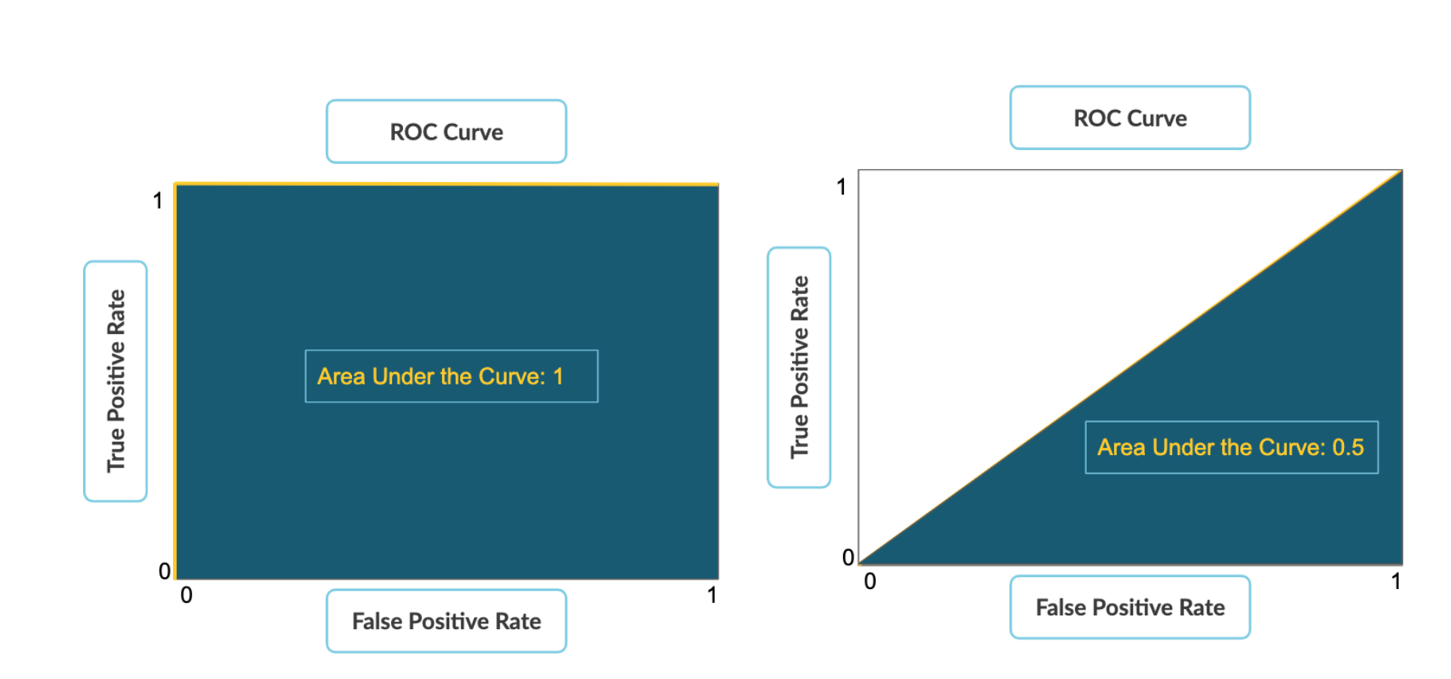
- Problematic models 
  - overfitting: model fits the training data too closely
  - underfittig: does not capture trends in the training data 
  - Imbalanced classes: more data points that belong to one category than another -> accuracy is not a very useful metrics,  and Precision-recall curves tend to be more informative when you have imbalanced classes.
      - upsampling: 
      - downsampling 

> **Confusion matrix**
>> 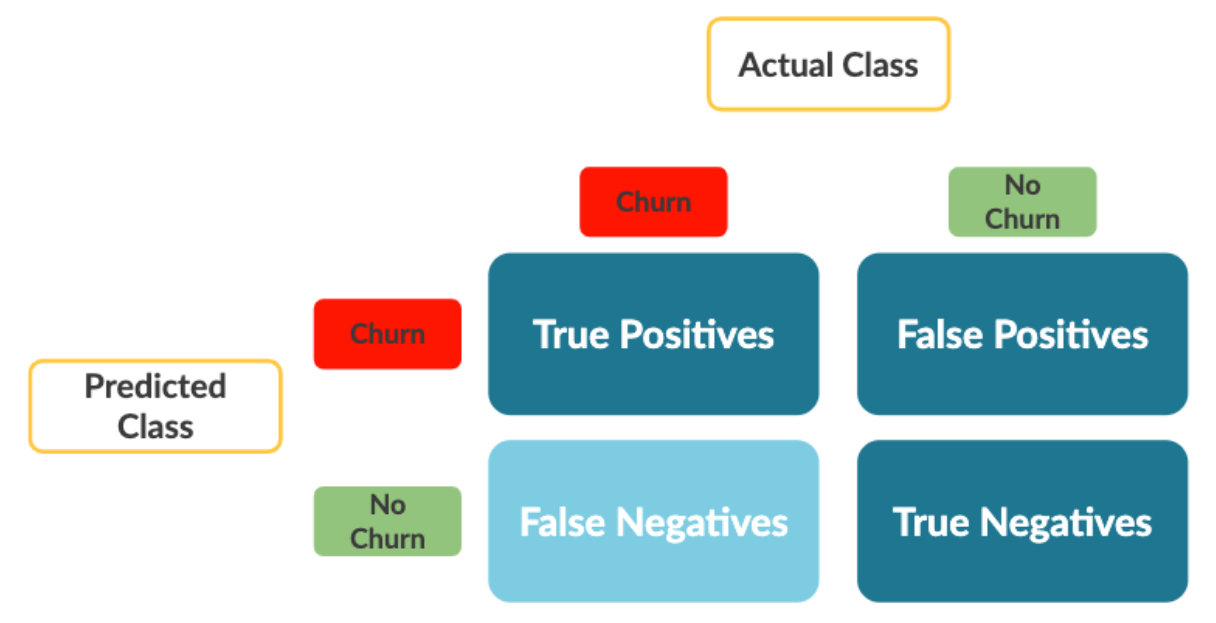
> - **accuracy_score**: Correctly predicted / Actual + Predicted *(TP + TN)/all*
> - **precision_score**: Correctly predicted Churn / Predicted Churn *TP/(TP+FP)* -> high scroce implies fewer false churners, which indicates not many non-churners are classified as churners 
> - **recall_score**: Correctly predicted Churn / Predicted *TP/(TP+FP)* -> high score implies the model has correctly classified the most churners
> - **f1_score**: 2 * (precision * recall) / (precision + recall) -> a high F1 score is a sign of a well-performing model, even in situations where you might have imbalanced classes.
>>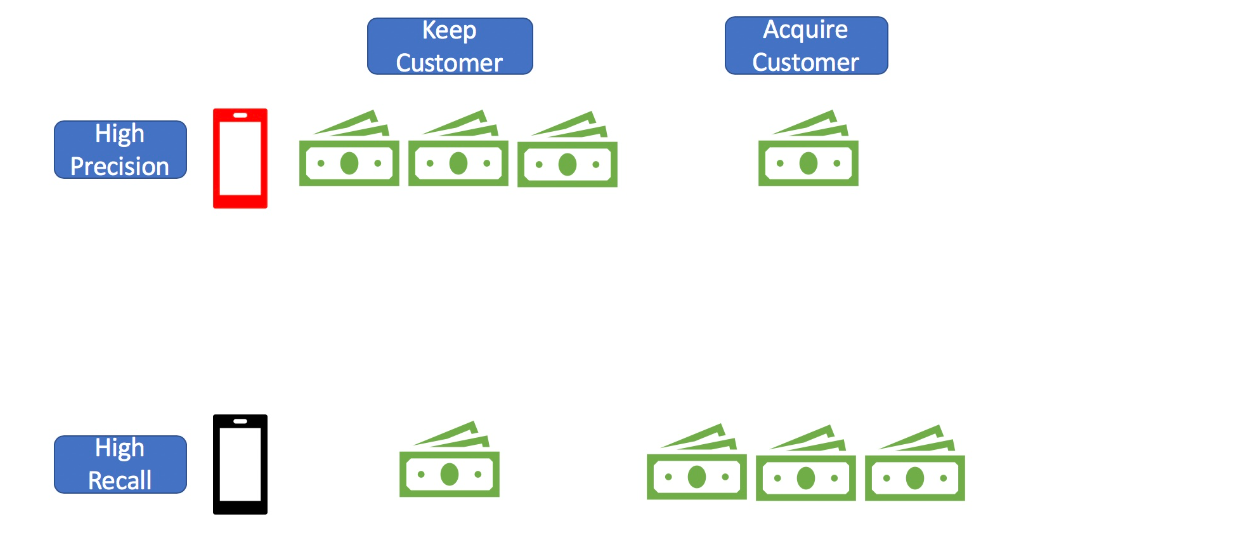

In [194]:
# imbalanced classes
telco['Churn'].value_counts()

# accuracy will predict the 85% customers of 0 correctly and 
# less accurate for the customers of 1

0    2850
1     483
Name: Churn, dtype: int64

**ROC curve**

In [209]:
y_pred_prob = logreg.predict_proba(test_X)[:,1]

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_y, y_pred_prob)
print(fpr[:5], tpr[:5], thresholds[:5])

[0.        0.        0.        0.0017762 0.0017762] [0.   0.01 0.03 0.03 0.04] [1.92869511 0.92869511 0.91560881 0.82613928 0.82352167]


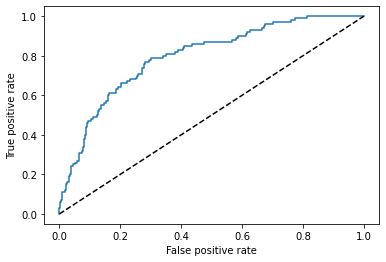

In [210]:
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0,1], [0,1], 'k--')
plt.show()

In [213]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_y,y_pred_prob)
auc

0.7959502664298401

In [181]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y,
                                                   test_size = 0.2,
                                                   random_state = 1)
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(2649, 62) (2649,) (663, 62) (663,)


### Support vector machines(SVM)
- X and y must be numpy or DataFrame
- X and y must be continuous 
- y must be 1d

In [182]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(train_X, train_y)

SVC()

In [184]:
prediction_svc = svc.predict(test_X)
print(prediction_svc[:10])

[0 0 0 0 0 0 0 0 0 0]


In [190]:
# evaluate 
svc.score(test_X, test_y)

0.8763197586726998

In [197]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, prediction_svc)
cm

array([[558,   5],
       [ 77,  23]], dtype=int64)

In [205]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(test_y, prediction_svc)
ps = precision_score(test_y, prediction_svc)
rs = recall_score(test_y, prediction_svc)
print('accuracy: {}, ps:{}, rs:{}'.format(accuracy,ps,rs))

accuracy: 0.8763197586726998, ps:0.8214285714285714, rs:0.23


In [214]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_y,prediction_svc)
auc

0.6105595026642983

In [216]:
from sklearn.metrics import f1_score
fs = f1_score(test_y, prediction_svc)
fs

0.359375

### LogisticRegression

In [187]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(train_X, train_y)

prediction_logreg = logreg.predict(test_X)
print(prediction_logreg[:10])

[0 0 0 0 0 0 0 1 0 0]


In [196]:
cm = confusion_matrix(test_y, prediction_logreg)
cm

array([[546,  17],
       [ 83,  17]], dtype=int64)

In [201]:
ps = precision_score(test_y, prediction_logreg)
rs = recall_score(test_y, prediction_logreg)
print('ps:{}, rs:{}'.format(ps,rs))

ps:0.5, rs:0.17


In [215]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_y,prediction_logreg)
auc

0.5699023090586146

In [219]:
from sklearn.metrics import f1_score
fs = f1_score(test_y, prediction_logreg)
fs

0.2537313432835821

### DecisionTreeClassifier

In [218]:
from sklearn.tree import DecisionTreeClassifier

mytree = DecisionTreeClassifier()
mytree.fit(train_X, train_y)

prediction_tree = mytree.predict(test_X)
print(prediction_tree[:10])

[0 0 0 0 0 0 1 1 0 0]


###  RandomForestClassifier
- 1. Take bootstrapped samples from the original dataset.
- 2. For each bootstrapped sample, build a decision tree using a random subset of the predictor variables.
- 3. Average the predictions of each tree to come up with a final model.

In [232]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
randomforest = RandomForestClassifier()

# Fit to the training data
randomforest.fit(train_X, train_y)

# Compute accuracy
print(randomforest.score(test_X, test_y))

0.8763197586726998


In [233]:
y_pred = randomforest.predict(test_X)

In [234]:
cm = confusion_matrix(test_y,  y_pred)
cm

array([[556,   7],
       [ 75,  25]], dtype=int64)

In [203]:
ps = precision_score(test_y, y_pred)
rs = recall_score(test_y, y_pred)
print('ps:{}, rs:{}'.format(ps,rs))

ps:0.7058823529411765, rs:0.24


## 4. Tuning the models 
- Hyperparameter tuning technique: grid-search cross validation
  - GridSearchCV
  - RandomizedSearchCV: randomly jump around the grid and try different combinations.
> **randomforest hyperparameter**
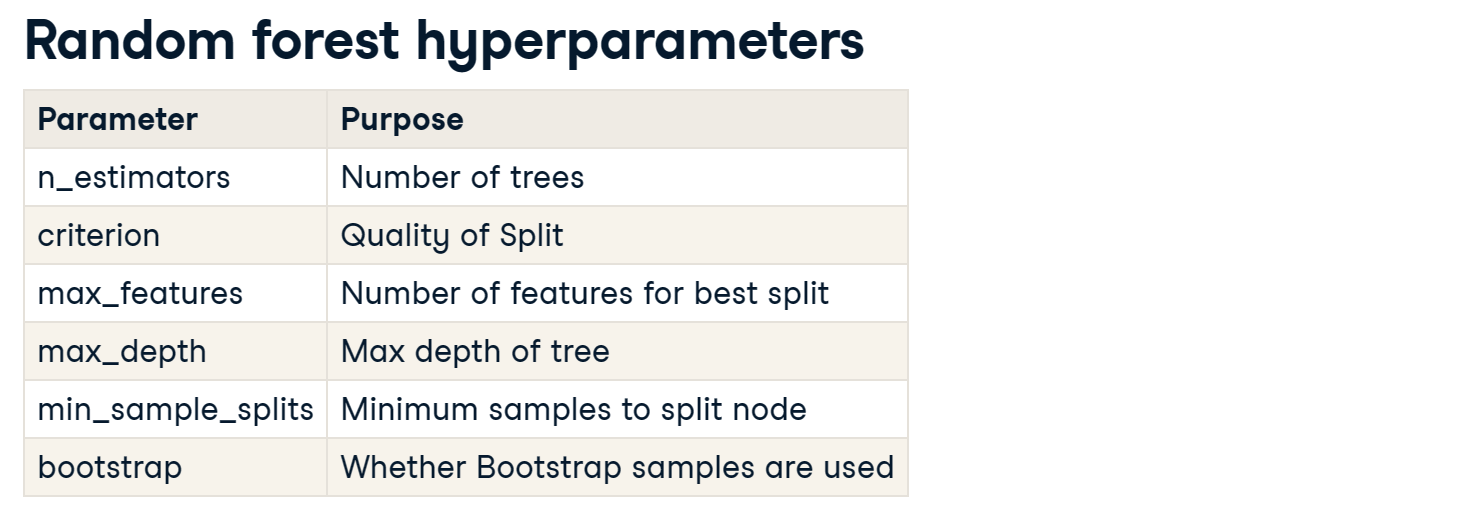
- Feature importance: score represents how much feature contribute to a prediction -> define the drivers of churn
  - Effective way to communicate results to stakeholders
  - Need to balance prediction accuracy and interpretability
- Adding new features
> 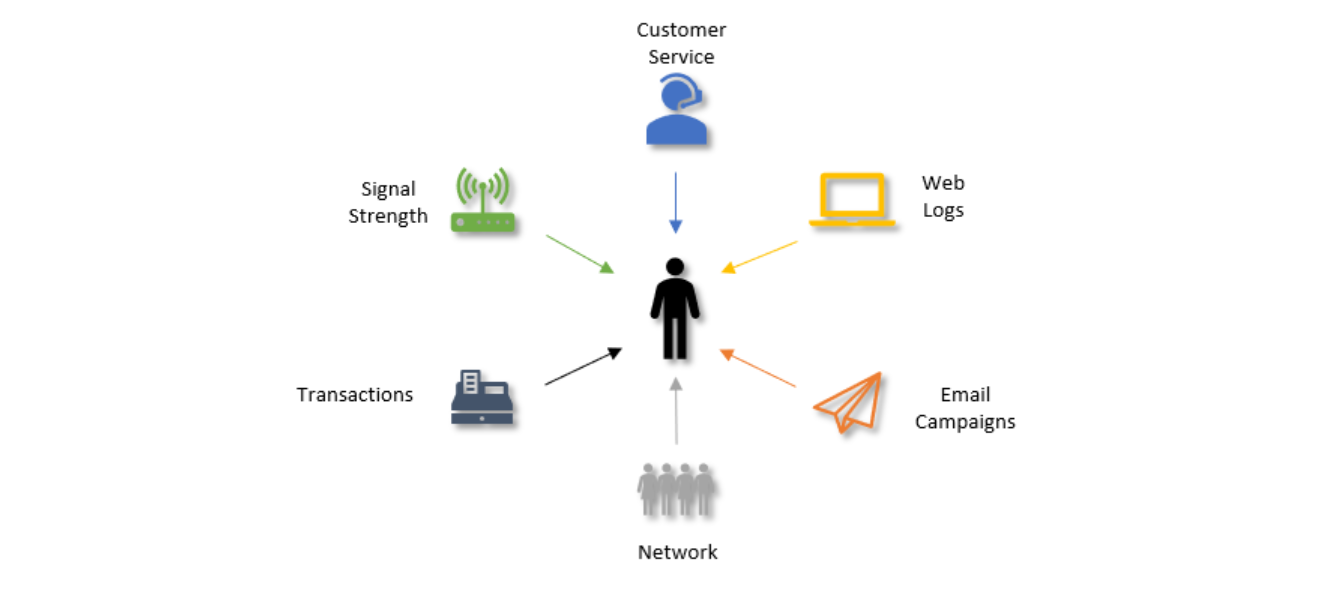
  - Benefits
    - improved return on investment
    - decreased costs
    - increased performance
  - Costs
    - increased complexity
    - increased resouces
    - increased time to operationalizing

**GridSearchCV**

In [221]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': np.arange(10,51)}
clf_cv = GridSearchCV(RandomForestClassifier(), param_grid)
clf_cv.fit(X,y)
clf_cv.best_params_

{'n_estimators': 50}

In [222]:
clf_cv.best_score_

0.8858748798148122

**RandomizedSearchCV**

In [230]:
# Import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Create the hyperparameter grid
param_dist = {"max_depth": [3, None],
              "max_features": np.arange(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Call RandomizedSearchCV
random_search = RandomizedSearchCV(RandomForestClassifier(), param_dist, cv=3)

# Fit the model
random_search.fit(X,y)

# Print best parameters
print(random_search.best_params_)

{'max_features': 10, 'max_depth': None, 'criterion': 'gini', 'bootstrap': False}


In [231]:
random_search.best_score_

0.8903985507246377

**Feature importance**

In [235]:
randomforest.feature_importances_

array([0.06259985, 0.0258233 , 0.11714047, 0.05963127, 0.06779004,
       0.06384064, 0.0630215 , 0.06270621, 0.05772728, 0.1160098 ,
       0.07032162, 0.0851613 , 0.00227201, 0.00249729, 0.00263035,
       0.0040179 , 0.00261297, 0.00439821, 0.00190722, 0.00343988,
       0.0021258 , 0.00285079, 0.00116805, 0.00065351, 0.00202477,
       0.00146677, 0.00255675, 0.00519532, 0.00200088, 0.00176382,
       0.0028077 , 0.00542091, 0.004413  , 0.00293378, 0.00306904,
       0.00247117, 0.00375965, 0.0033549 , 0.00347902, 0.00250915,
       0.00152596, 0.00288968, 0.00519172, 0.00234499, 0.00531241,
       0.00287614, 0.0036985 , 0.00247802, 0.00399469, 0.00225829,
       0.0021096 , 0.00474633, 0.00185258, 0.00123861, 0.00472859,
       0.00279585, 0.00241049, 0.00306695, 0.00546325, 0.00257862,
       0.00247537, 0.00238944])

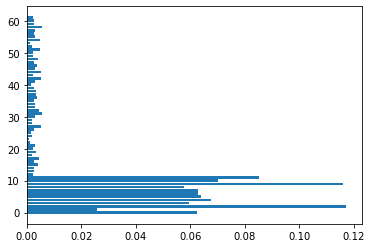

In [237]:
# Calculate feature importances
importances = randomforest.feature_importances_

# Create plot
plt.barh(range(X.shape[1]), importances)
plt.show()

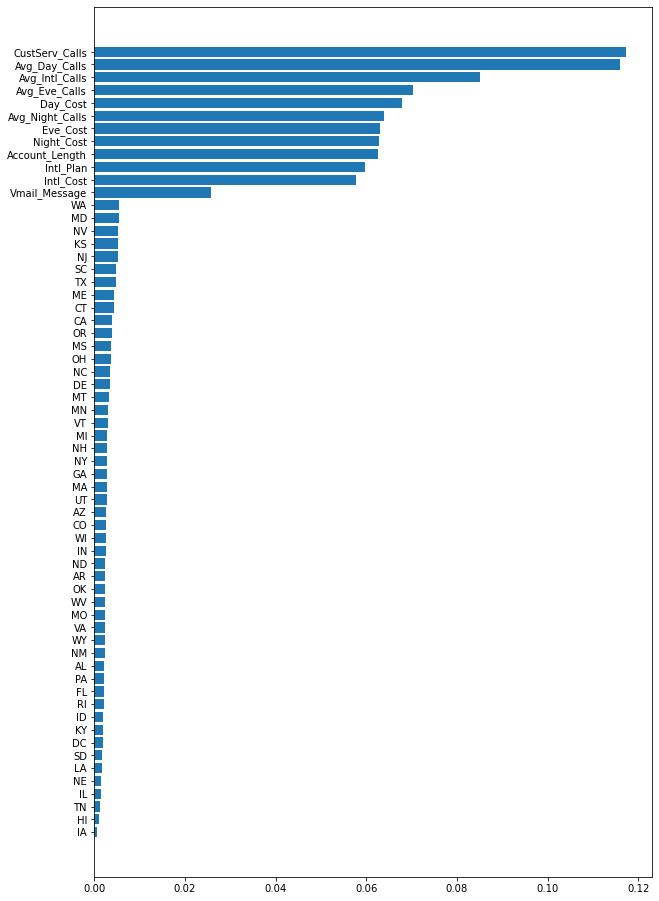

In [250]:
plt.figure(figsize=(10,16))

# Sort importances
sorted_index = np.argsort(importances)

# Create labels
labels = X.columns[sorted_index]

# Clear current plot
plt.clf()

# Create plot
plt.barh(range(X.shape[1]), 
         importances[sorted_index],
         tick_label= labels)
plt.show()

**Recommended next steps:** 
- exploratory data analysis in python
- designing machine learning workflows in python
Additonal resources:
- kaggle competitions
- cousera advanced business analytics specialization